# <font color = RED> Titanic </font>

# Business Understanding
Predict the Survival of Titanic Passengers 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Understanding
- Survival (0=No, 1 =Yes)
- pclass (1st=Upper, 2nd = Middle, 3rd=Lower)
- Ticket class (1 = 1st, 2=2nd, 3=3rd)
- Age in years
- SibSp (# of sibling/ spouses abroad the Titanic)
- Parch (# of children/ children abroad the Titanic)
- fare (passenger fare)
- embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


>

**age:**
Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
df['PassengerId'].nunique()

891

In [6]:
df.drop(columns = ['PassengerId'], inplace=True)

we can't drop this PassengerId column because in test.csv we are reuqired this column and it column should match from test.csv file that's why I am keeping this column

In [7]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [10]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [15]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [16]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [17]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [18]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [19]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [20]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [21]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

- 8.0500: This fare price was paid by 43 passengers.
- 13.0000: This fare price was paid by 42 passengers.
> ---- so on

In [22]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [24]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [26]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [27]:
continuous = ['Survived', 'Age', 'Fare']
discrete_count = ['Pclass', 'SibSp', 'Parch']
discrete_categorical = ['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin']

*by the way remember 'Survided' column is a binary categorical varible so it should come under categorical varibale but I keep this inside continuous because in order to get summary*

### Exploratory Data Analysis (EDA)
#### EDA for continuous variables

In [28]:
df[continuous].describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


when age = 0.420000 mean 5 month

This could indicate that the passenger was an infant or a very young child at the time of the Titanic's voyage.

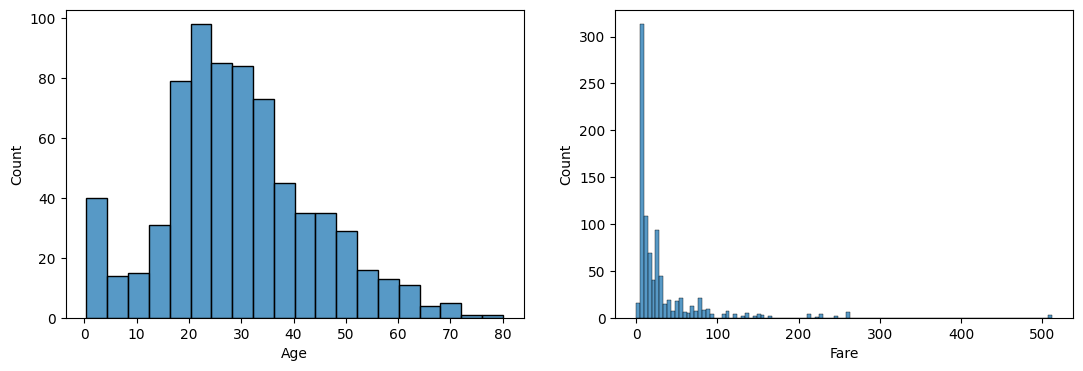

In [29]:
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1, 2, 1)
sns.histplot(df['Age'])

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'])

plt.show()

In [30]:
df[continuous].skew()

Survived    0.478523
Age         0.389108
Fare        4.787317
dtype: float64

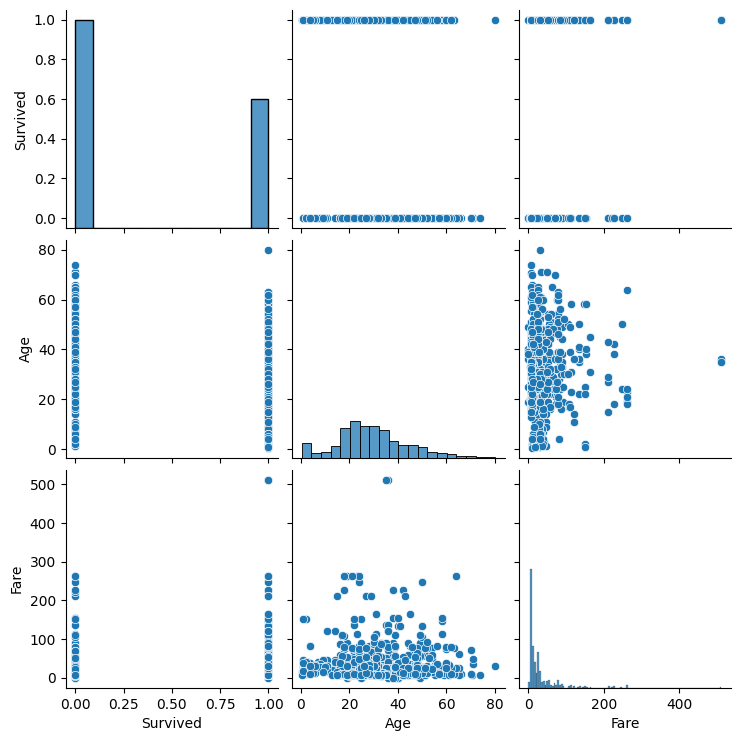

In [31]:
plt.rcParams['figure.figsize'] = (13, 4)
sns.pairplot(df[continuous])
plt.show()

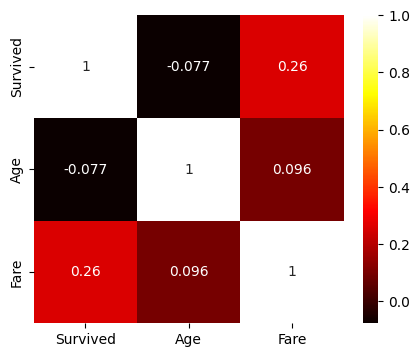

In [32]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[continuous].corr(), annot=True, cmap='hot')
plt.show()

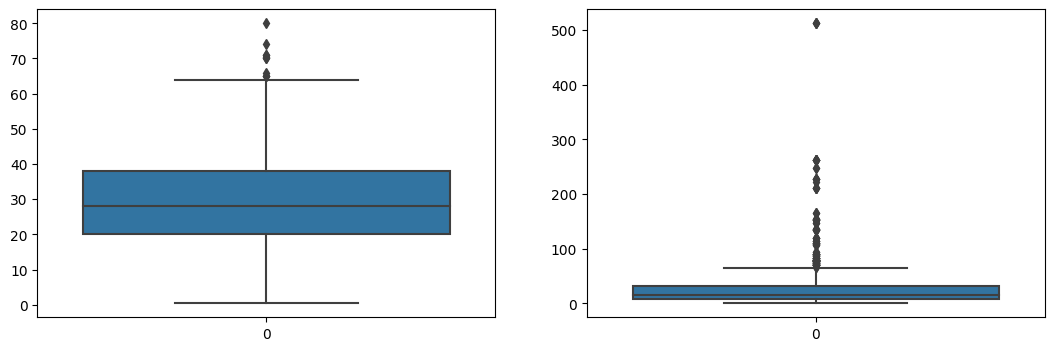

In [33]:
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1, 2, 1)
sns.boxplot(df['Age'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Fare'])

plt.show()

#### EDA for discrete variables

In [34]:
df[discrete_categorical].describe()

,Name,Sex,Embarked,Ticket,Cabin
count,891,891,889,891,204
unique,891,2,3,681,147
top,"Braund, Mr. Owen Harris",male,S,347082,B96 B98
freq,1,577,644,7,4


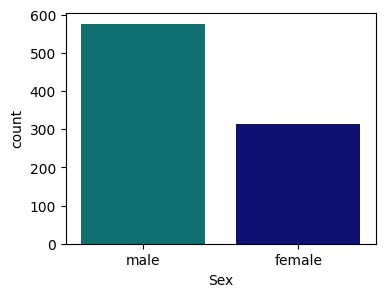

In [35]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Sex', palette=['teal', 'navy'])
plt.show()

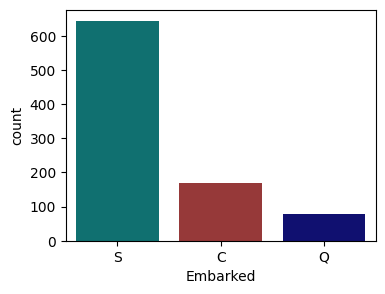

In [36]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Embarked', palette=['teal', 'brown', 'navy'])
plt.show()

# Data Preparation

#### 'SciSp' and 'Parch' both columns are family column so I combined it.

In [37]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [38]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [39]:
df['Family'] = df['SibSp'] + df['Parch']

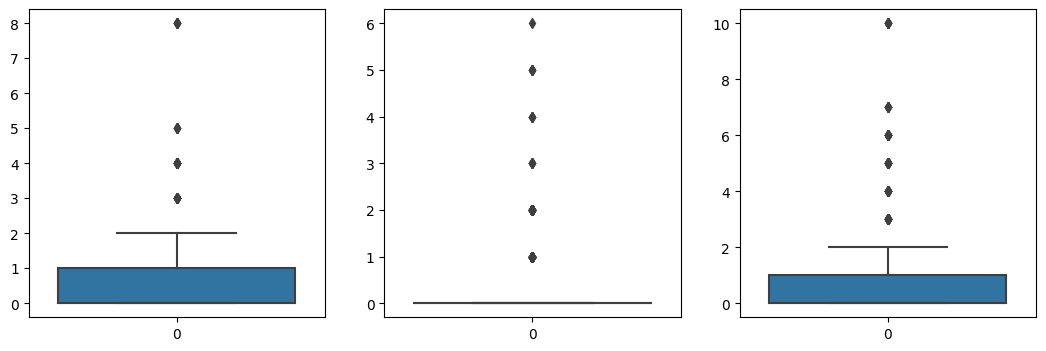

In [40]:
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1, 3, 1)
sns.boxplot(df['SibSp'])

plt.subplot(1, 3, 2)
sns.boxplot(df['Parch'])

plt.subplot(1, 3, 3)
sns.boxplot(df['Family'])
plt.show()

In [41]:
df.drop(columns= ['SibSp', 'Parch'], inplace=True)

In [42]:
df['Family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [43]:
df['Family'].value_counts()

Family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

#### Missing value treatment

In [44]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
Ticket        0
Fare          0
Cabin       687
Embarked      2
Family        0
dtype: int64

In [45]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

##### as we know when we have missing values more than 30% so drop that but here as we can see our cabin column have 77% missing values so we will drop entire column

In [46]:
df.drop(columns = 'Cabin', inplace=True)

In [47]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#### drop unimportant column

In [48]:
df.drop(columns = ['Name', 'Ticket'], inplace=True)

#### Outliers Treatment

**AGE**

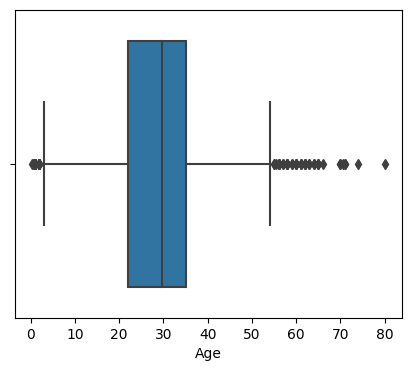

In [49]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['Age'])
plt.show()

In [50]:
# Calculate Q1
Q1 = df['Age'].quantile(0.25)
print("Q1: ", Q1)

# Calculate Q2
Q3 = df['Age'].quantile(0.75)
print("Q3: ", Q3)

# Calculate IQR
IQR = Q3 - Q1
print('IQR:', IQR)

# Calculate lower limit of outliers
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit', lower_limit)

# Calculate upper limit of outliers
upper_limit = Q3 + (IQR * 1.5)
print('upper_limit', upper_limit)

Q1:  22.0
Q3:  35.0
IQR: 13.0
lower_limit 2.5
upper_limit 54.5


In [51]:
# list of outliers
df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)].index

Index([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164, 170,
       172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305, 326, 340,
       366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492, 493, 530, 545,
       555, 570, 587, 625, 626, 630, 642, 644, 647, 659, 672, 684, 694, 745,
       755, 772, 788, 803, 824, 827, 829, 831, 851, 879],
      dtype='int64')

In [52]:
# winsorization technqiue (for replacing outliers)
df['Age'] = df['Age'].clip(lower=2.5, upper=54.5)
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

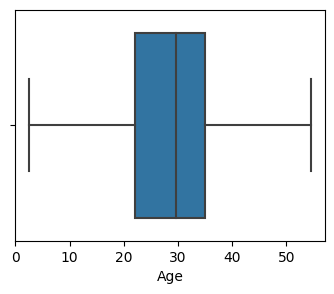

In [53]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Age'])
plt.show()

**FARE**

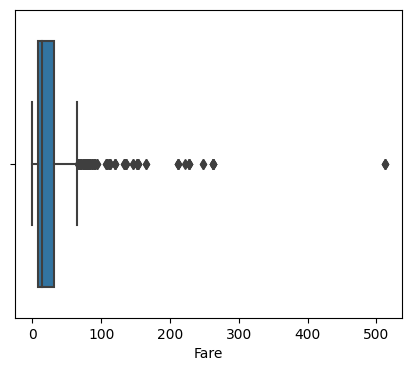

In [54]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['Fare'])
plt.show()

In [55]:
# Calculate Q1
Q1 = df['Fare'].quantile(0.25)
print("Q1: ", Q1)

# Calculate Q2
Q3 = df['Fare'].quantile(0.75)
print("Q3: ", Q3)

# Calculate IQR
IQR = Q3 - Q1
print('IQR:', IQR)

# Calculate lower limit of outliers
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit', lower_limit)

# Calculate upper limit of outliers
upper_limit = Q3 + (IQR * 1.5)
print('upper_limit', upper_limit)

Q1:  7.9104
Q3:  31.0
IQR: 23.0896
lower_limit -26.724
upper_limit 65.6344


In [56]:
len(df[(df['Fare'] < lower_limit) | (df['Fare'] > upper_limit)])

116

#### Logarithmic transformation

In [57]:
import numpy as np
df['Fare'] = np.log(df['Fare']+0.1) 
df['Fare'].skew()

-0.9166865254725971

even after using lof transformation, I still have outliers so, I can use winsorization technique

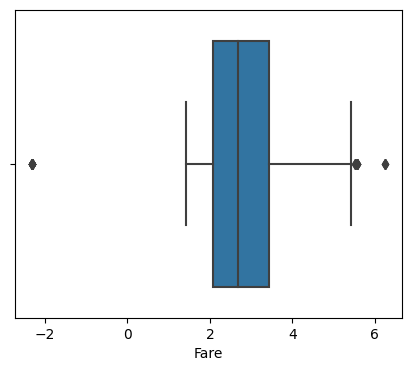

In [58]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['Fare'])
plt.show()

In [59]:
# Calculate Q1
Q1 = df['Fare'].quantile(0.25)
print("Q1: ", Q1)

# Calculate Q2
Q3 = df['Fare'].quantile(0.75)
print("Q3: ", Q3)

# Calculate IQR
IQR = Q3 - Q1
print('IQR:', IQR)

# Calculate lower limit of outliers
lower_limit = Q1 - (IQR * 2)
print('lower_limit', lower_limit)

# Calculate upper limit of outliers
upper_limit = Q3 + (IQR * 2)
print('upper_limit', upper_limit)

Q1:  2.0807390364175813
Q3:  3.4372078191851885
IQR: 1.3564687827676072
lower_limit -0.6321985291176331
upper_limit 6.150145384720403


In [60]:
# winsorization technqiue (for replacing outliers)
df['Fare'] = df['Fare'].clip(lower=-0.63, upper=6.15)
df['Fare']

0      1.994700
1      4.268064
2      2.082562
3      3.974058
4      2.098018
         ...   
886    2.572612
887    3.404525
888    3.159126
889    3.404525
890    2.060514
Name: Fare, Length: 891, dtype: float64

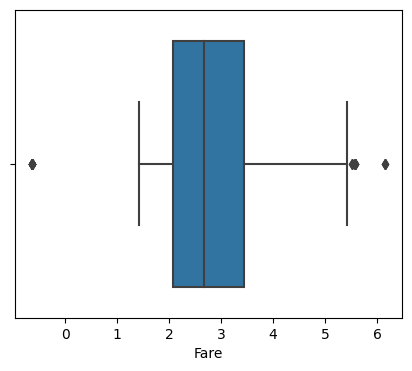

In [61]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['Fare'])
plt.show()

In [62]:
len(df[(df['Fare'] < lower_limit) | (df['Fare'] > upper_limit)])

0

for handling outliers in **'Fare'** column, I used two technique:
1. **Logarithmic Transformation:** Apply the logarithmic transformation to the 'Fare' column to reduce the skewness caused by outliers.

2. **Winsorization (IQR Method):** After applying the logarithmic transformation, calculate the interquartile range (IQR) of the transformed 'Fare' column. 

In [63]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,1.994700,S,1
1,1,1,female,38.0,4.268064,C,1
2,1,3,female,26.0,2.082562,S,0
3,1,1,female,35.0,3.974058,S,1
4,0,3,male,35.0,2.098018,S,0


#### Encoding

In [64]:
df['Sex'] = df['Sex'].replace({'male':1, 'female':0}).astype('int')
df['Embarked'] = df['Embarked'].replace({'S':2, 'Q':1, 'C':0}).astype('int')

In [65]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,1.994700,2,1
1,1,1,0,38.0,4.268064,0,1
2,1,3,0,26.0,2.082562,2,0
3,1,1,0,35.0,3.974058,2,1
4,0,3,1,35.0,2.098018,2,0


## These are the steps that I followed for Data Preparation

1. **Transformation of Categorical Variables:**
- The 'Sex' column has been transformed into a binary variable ('male' -> 1, 'female' -> 0).
- The 'Embarked' column has been transformed into numerical values (e.g., 'S' -> 2), presumably through label encoding or one-hot encoding.

2. **Feature Engineering:**
- A new feature 'Family' has been introduced, possibly representing the total number of family members on board (sum of 'SibSp' and 'Parch' columns).

3. **Normalization of Continuous Variables:**
- The 'Age' and 'Fare' columns seem to have been normalized or scaled, as the values are different from the original dataset.

4. **Dropping of Irrelevant Columns:**
- Columns such as 'PassengerId', 'Name', 'SibSp', 'Parch', and 'Ticket' have been dropped, presumably because they are deemed irrelevant for the analysis or modeling.

#### X & y

In [66]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [192]:
X.dtypes

Pclass        int64
Sex           int32
Age         float64
Fare        float64
Embarked      int32
Family        int64
dtype: object

#### Identify the best random state number

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


Train = []
Test = []
CV = []

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=i)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)
    
    Train.append(model.score(X_train, y_train))
    Test.append(model.score(X_test, y_test))
    
    CV.append(cross_val_score(model, X_train, y_train, cv=5,scoring= "accuracy").mean())
    
em = pd.DataFrame({'Train':Train, 'Test':Test, 'CV':CV}) 
gm = em[(abs(em['Train']-em['Test']) <= 0.05) & (abs(em['Test']-em['CV']) <=0.05)]
rs = gm[gm['CV']==gm['CV'].max()].index.to_list()
print('best random state number:', rs)

best random state number: [23]


In [68]:
rs = int(rs[0])
rs

23

In [69]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,1.994700,2,1
1,1,1,0,38.0,4.268064,0,1
2,1,3,0,26.0,2.082562,2,0
3,1,1,0,35.0,3.974058,2,1
4,0,3,1,35.0,2.098018,2,0


#### train-test split

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

## Scaling for pca

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
X_train

array([[-1.55453842, -1.33463478, -0.59056506,  1.26557066,  0.5930441 ,
         0.03502428],
       [ 0.83861046,  0.74926865, -0.50845373, -0.8166055 ,  0.5930441 ,
        -0.57320224],
       [ 0.83861046,  0.74926865, -1.08323301,  0.10033485,  0.5930441 ,
         0.6432508 ],
       ...,
       [ 0.83861046, -1.33463478,  0.88743881, -0.63968963,  0.5930441 ,
         0.03502428],
       [-1.55453842, -1.33463478, -0.67267638,  2.61026235, -1.89076414,
         1.85970383],
       [ 0.83861046,  0.74926865,  0.55899351,  0.27243771,  0.5930441 ,
         0.6432508 ]])

### Applying PCA 

In [73]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=0.95)
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

In [74]:
pca_model.explained_variance_ratio_

array([0.32926955, 0.249767  , 0.16389872, 0.12852574, 0.0975568 ])

# Modeling & Evaluation

#### 1. Logistic Regressiom

In [75]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8075842696629213
Cross Validation Score: 0.8104402639613907
Test Accuracy: 0.7653631284916201


### PCA model

In [76]:
from sklearn.linear_model import LogisticRegression
log_pca_model = LogisticRegression()
log_pca_model.fit(X_train_pca, y_train)

ypred_train = log_pca_model.predict(X_train_pca)
ypred_test = log_pca_model.predict(X_test_pca)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(log_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8103932584269663
Cross Validation Score: 0.8062247611543387
Test Accuracy: 0.770949720670391


In [77]:
log_features = df.shape[1]
log_model_train = accuracy_score(y_train, ypred_train)
log_model_cv = cross_val_score(log_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean()
log_model_test = accuracy_score(y_test, ypred_test)

In [78]:
log = pd.DataFrame([log_features, log_model_train, log_model_cv, log_model_test], columns=['LOG'], index=['No._FEATURES', 'TRAIN', 'CV', 'TEST'])
log

,LOG
No._FEATURES,7.000000
TRAIN,0.810393
CV,0.806225
TEST,0.770950


#### 2. KNN

In [80]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1, 50))}

knn_model = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
knn_model.fit(X_train, y_train)
knn_model.best_params_

{'n_neighbors': 5}

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8707865168539326
Cross Validation Score: 0.8230178272431795
Test Accuracy: 0.8100558659217877


### PCA model

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca_model = KNeighborsClassifier()
knn_pca_model.fit(X_train_pca, y_train)

ypred_train = knn_pca_model.predict(X_train_pca)
ypred_test = knn_pca_model.predict(X_test_pca)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(knn_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8679775280898876
Cross Validation Score: 0.813158672313602
Test Accuracy: 0.7821229050279329


In [84]:
knn_features = df.shape[1]
knn_model_train = accuracy_score(y_train, ypred_train)
knn_model_cv = cross_val_score(knn_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean()
knn_model_test = accuracy_score(y_test, ypred_test)

In [85]:
knn = pd.DataFrame([knn_features, knn_model_train, knn_model_cv, knn_model_test], columns=['KNN'], index=['No._FEATURES', 'TRAIN', 'CV', 'TEST'])
knn

,KNN
No._FEATURES,7.000000
TRAIN,0.867978
CV,0.813159
TEST,0.782123


#### 3. SVM

In [86]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C':[0.01, 0.1, 1], 'kernel':['linear', 'rbf', 'sigmoid', 'poly']}

svm_model_ = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
svm_model_.fit(X_train, y_train)
svm_model_.best_params_

{'C': 1, 'kernel': 'rbf'}

In [88]:
from sklearn.svm import SVC
svm_model = SVC(C=1, kernel='poly')
svm_model.fit(X_train, y_train)

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8370786516853933
Cross Validation Score: 0.8216684723726978
Test Accuracy: 0.770949720670391


### PCA model

In [89]:
from sklearn.svm import SVC
svm_pca_model = SVC()
svm_pca_model.fit(X_train_pca, y_train)

ypred_train = svm_pca_model.predict(X_train_pca)
ypred_test = svm_pca_model.predict(X_test_pca)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(svm_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8370786516853933
Cross Validation Score: 0.8244755244755245
Test Accuracy: 0.8100558659217877


In [90]:
svm_features = df.shape[1]
svm_model_train = accuracy_score(y_train, ypred_train)
svm_model_cv = cross_val_score(svm_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean()
svm_model_test = accuracy_score(y_test, ypred_test)

In [91]:
svm = pd.DataFrame([svm_features, svm_model_train, svm_model_cv, svm_model_test], columns=['SVM'], index=['No._FEATURES', 'TRAIN', 'CV', 'TEST'])
svm

,SVM
No._FEATURES,7.000000
TRAIN,0.837079
CV,0.824476
TEST,0.810056


#### 4. Decision Tree Classifier

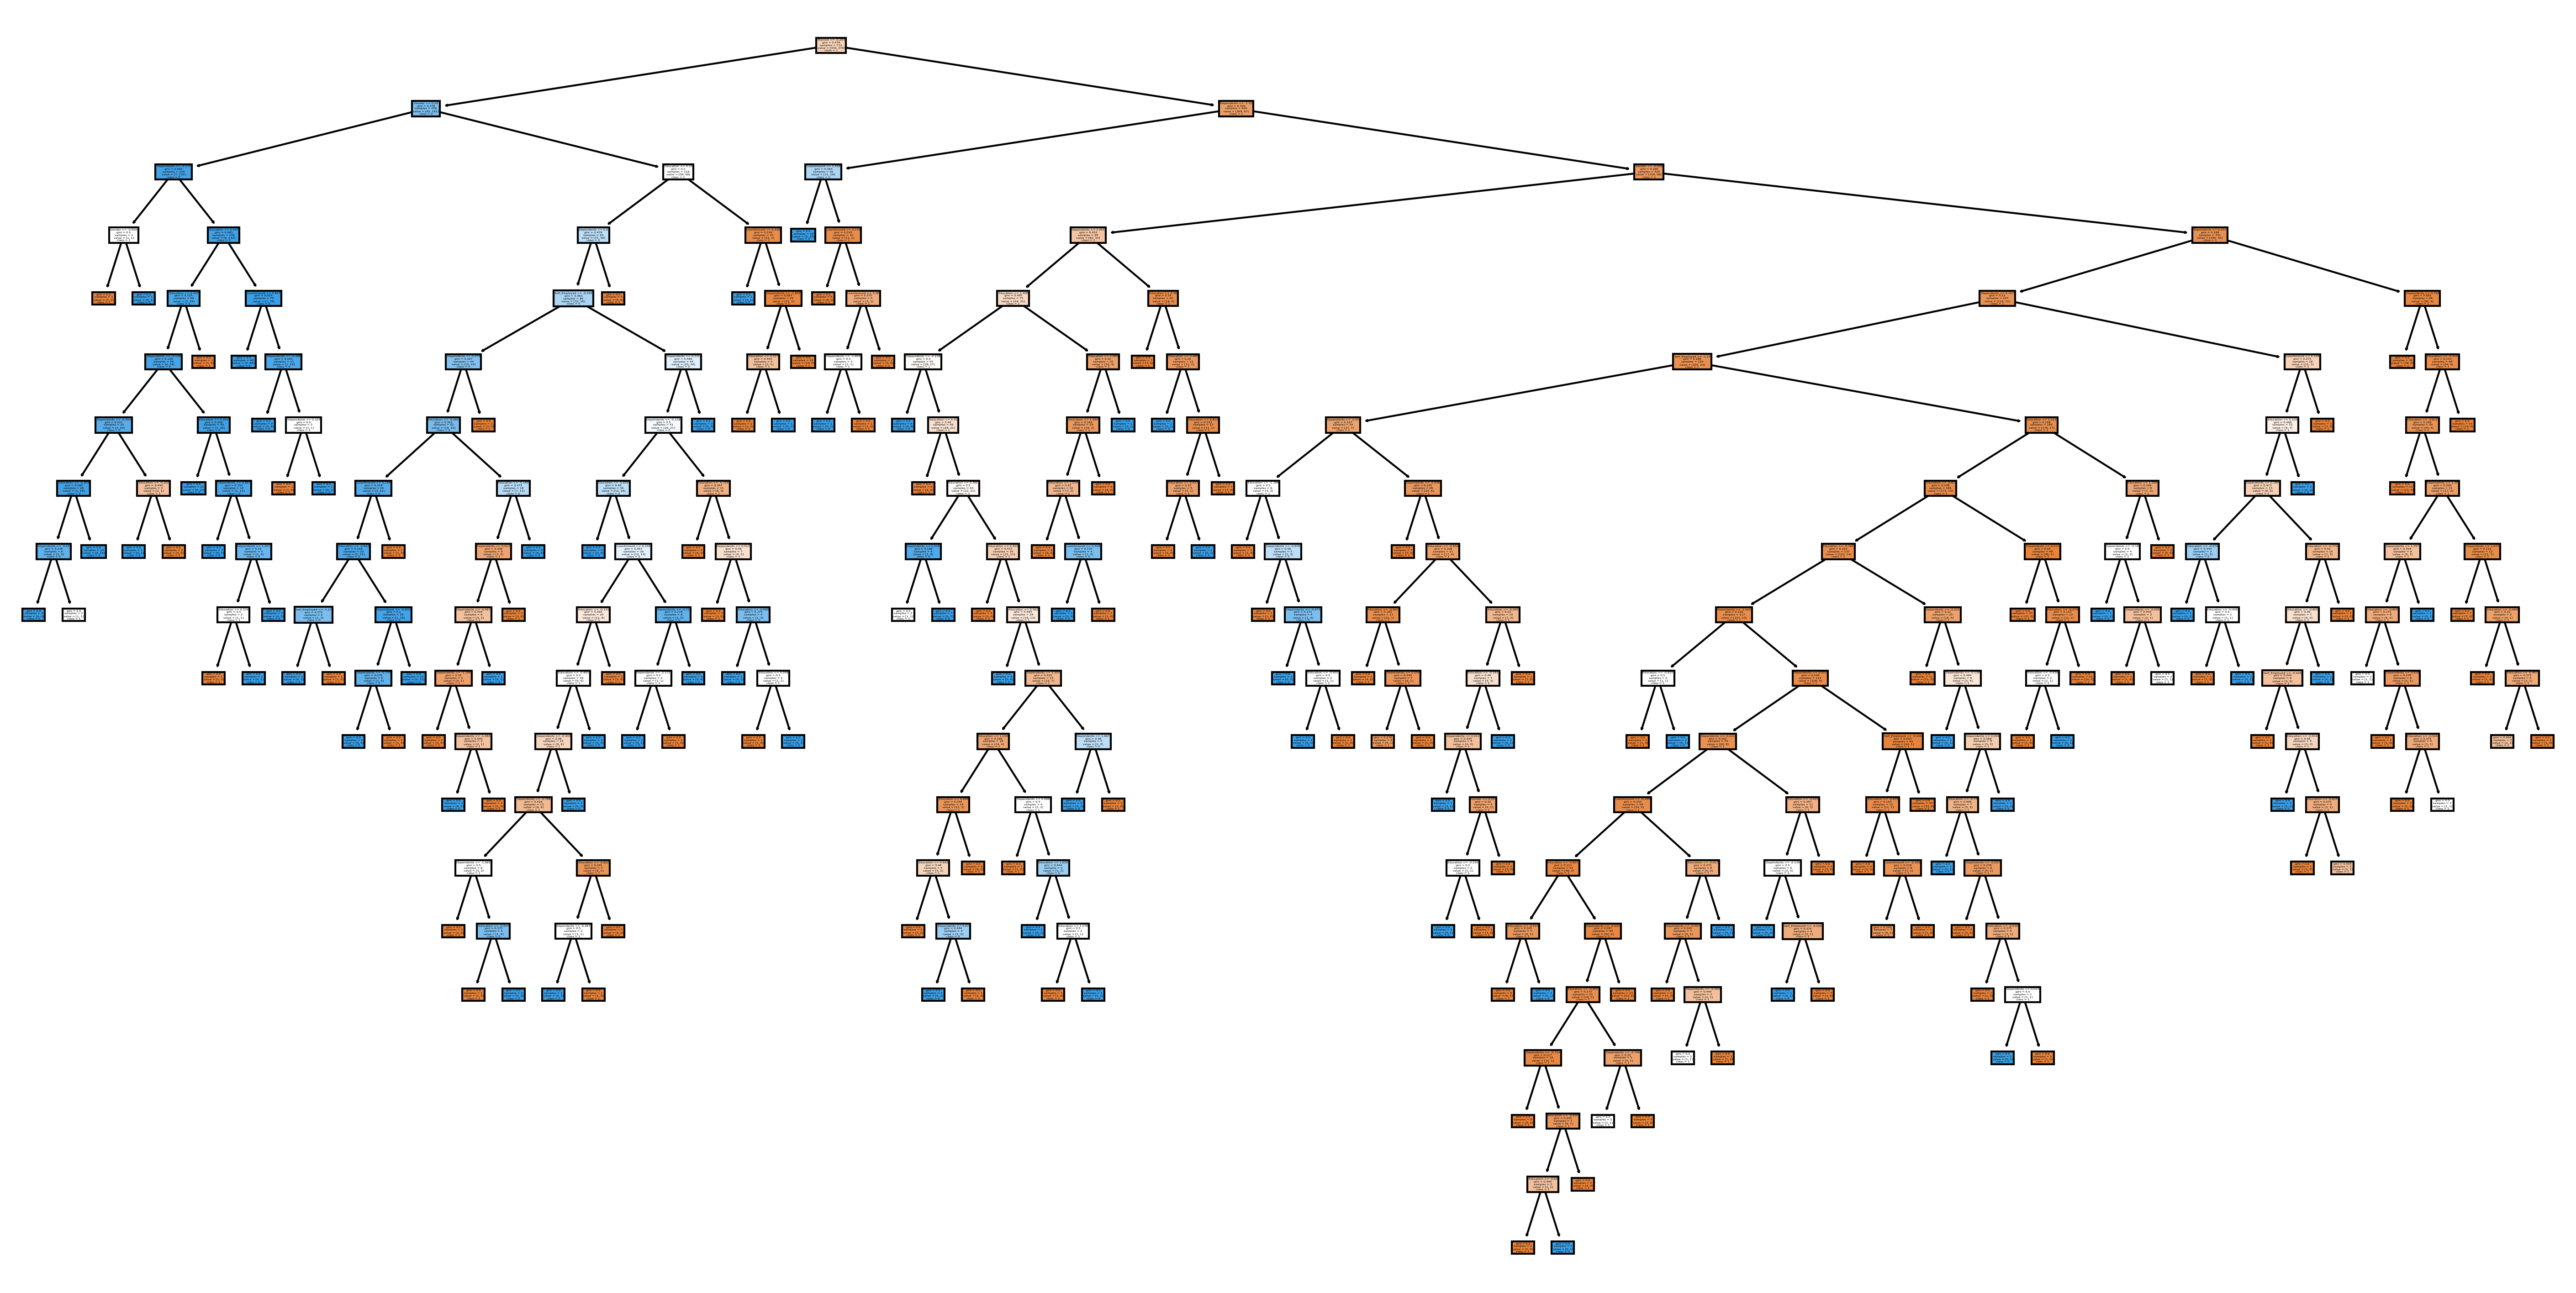

In [92]:
# Modelling
from sklearn.tree import DecisionTreeClassifier
dt_model_ = DecisionTreeClassifier()
dt_model_.fit(X_train, y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(24, 12), dpi=300)
plot_tree(dt_model_, filled=True, feature_names=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Income'], class_names=['1', '0'])
plt.show()

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy'],
             'max_depth':list(range(1, 21))}

dt_grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [94]:
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [95]:
# Feature importance
data = dt_grid.best_estimator_.feature_importances_
feats = pd.DataFrame(data, index=X.columns, columns=['Feature Importance'])
feats_imp = feats[feats['Feature Importance']>0]
importance_features_list = feats_imp.index.to_list()
importance_features_list

['Pclass', 'Sex', 'Age', 'Fare', 'Family']

In [96]:
len(importance_features_list)

5

In [97]:
X_imp = X[importance_features_list]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_imp, y, test_size=0.2, random_state=rs)
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt_model.fit(X_train_dt, y_train_dt)

ypred_train = dt_model.predict(X_train_dt)
ypred_test = dt_model.predict(X_test_dt)

print('Train Accuracy:', accuracy_score(y_train_dt, ypred_train))
print('Cross Validation Score:', cross_val_score(dt_model, X_train_dt, y_train_dt, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test_dt, ypred_test))

Train Accuracy: 0.848314606741573
Cross Validation Score: 0.8301191765980498
Test Accuracy: 0.7988826815642458


### PCA model

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt_pca_model = DecisionTreeClassifier()
dt_pca_model.fit(X_train_pca, y_train)

ypred_train = dt_pca_model.predict(X_train_pca)
ypred_test = dt_pca_model.predict(X_test_pca)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(dt_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.9845505617977528
Cross Validation Score: 0.7444499162809022
Test Accuracy: 0.7486033519553073


In [99]:
dt_features = len(importance_features_list)
dt_model_train = accuracy_score(y_train, ypred_train)
dt_model_cv = cross_val_score(dt_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean()
dt_model_test = accuracy_score(y_test, ypred_test)

In [100]:
dt = pd.DataFrame([dt_features, dt_model_train, dt_model_cv, dt_model_test], columns=['DT'], index=['No._FEATURES', 'TRAIN', 'CV', 'TEST'])
dt

,DT
No._FEATURES,5.000000
TRAIN,0.984551
CV,0.727627
TEST,0.748603


#### 5. Random Forest Classifier

In [101]:
# GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier(random_state=70)
param_grid = {'n_estimators':list(range(1, 101))}
rf_grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'n_estimators': 16}

In [102]:
rf_grid.best_estimator_

RandomForestClassifier(n_estimators=16, random_state=70)

In [103]:
# Feature importance
data = rf_grid.best_estimator_.feature_importances_
feats = pd.DataFrame(data, index=X.columns, columns=['Feature Importance'])
feats_imp = feats[feats['Feature Importance']>0]
importance_features_list = feats_imp.index.to_list()
importance_features_list

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']

In [104]:
len(importance_features_list)

6

In [105]:
# rf --> model
# X_train_rf --> best_model_
X_imp = X[importance_features_list]
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_imp, y, test_size=0.2, random_state=rs)
rf_model = RandomForestClassifier(n_estimators=500, random_state=rs)
rf_model.fit(X_train_rf, y_train_rf)

ypred_train = rf_model.predict(X_train_rf)
ypred_test = rf_model.predict(X_test_rf)

print('Train Accuracy:', accuracy_score(y_train_rf, ypred_train))
print('Cross Validation Score:', cross_val_score(rf_model, X_train_rf, y_train_rf, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test_rf, ypred_test))

Train Accuracy: 0.9845505617977528
Cross Validation Score: 0.818851570964247
Test Accuracy: 0.7821229050279329


### PCA model

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_pca_model = RandomForestClassifier()
rf_pca_model.fit(X_train_pca, y_train)

ypred_train = rf_pca_model.predict(X_train_pca)
ypred_test = rf_pca_model.predict(X_test_pca)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(rf_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.9845505617977528
Cross Validation Score: 0.7850980005909584
Test Accuracy: 0.7318435754189944


In [107]:
rf_features = len(importance_features_list)
rf_model_train = accuracy_score(y_train, ypred_train)
rf_model_cv = cross_val_score(rf_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean()
rf_model_test = accuracy_score(y_test, ypred_test)

In [108]:
rf = pd.DataFrame([rf_features, rf_model_train, rf_model_cv, rf_model_test], columns=['RF'], index=['No._FEATURES', 'TRAIN', 'CV', 'TEST'])
rf

,RF
No._FEATURES,6.000000
TRAIN,0.984551
CV,0.780902
TEST,0.731844


#### 6. AdaBoost Classifier

In [109]:
# GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator_ab = AdaBoostClassifier(random_state=70)
param_grid = {'n_estimators':list(range(1, 51))}
ab_grid = GridSearchCV(estimator_ab, param_grid, cv=5, scoring='accuracy')
ab_grid.fit(X_train, y_train)
ab_grid.best_params_

{'n_estimators': 44}

In [110]:
# Feature importance
data = ab_grid.best_estimator_.feature_importances_
feats = pd.DataFrame(data, index=X.columns, columns=['Feature Importance'])
feats_imp = feats[feats['Feature Importance']>0]
importance_features_list = feats_imp.index.to_list()
importance_features_list

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']

In [111]:
len(importance_features_list)

6

In [112]:
ab_grid.best_estimator_

AdaBoostClassifier(n_estimators=44, random_state=70)

In [113]:
X_imp = X[importance_features_list]
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X_imp, y, test_size=0.2, random_state=rs)
ab_model = AdaBoostClassifier(n_estimators=3, random_state=70)
ab_model.fit(X_train_ab, y_train_ab)

ypred_train = ab_model.predict(X_train_ab)
ypred_test = ab_model.predict(X_test_ab)

print('Train Accuracy:', accuracy_score(y_train_ab, ypred_train))
print('Cross Validation Score:', cross_val_score(ab_model, X_train_ab, y_train_ab, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test_ab, ypred_test))

Train Accuracy: 0.8117977528089888
Cross Validation Score: 0.7992416034669555
Test Accuracy: 0.8044692737430168


### PCA model

In [114]:
from sklearn.ensemble import AdaBoostClassifier
ab_pca_model = AdaBoostClassifier()
ab_pca_model.fit(X_train_pca, y_train)

ypred_train = ab_pca_model.predict(X_train_pca)
ypred_test = ab_pca_model.predict(X_test_pca)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(ab_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8637640449438202
Cross Validation Score: 0.7837781936373485
Test Accuracy: 0.7653631284916201


In [115]:
ab_features = len(importance_features_list)
ab_model_train = accuracy_score(y_train, ypred_train)
ab_model_cv = cross_val_score(ab_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean()
ab_model_test = accuracy_score(y_test, ypred_test)

In [116]:
ab = pd.DataFrame([ab_features, ab_model_train, ab_model_cv, ab_model_test], columns=['AB'], index=['No._FEATURES', 'TRAIN', 'CV', 'TEST'])
ab

,AB
No._FEATURES,6.000000
TRAIN,0.863764
CV,0.783778
TEST,0.765363


#### 7. GradientBoost Classifier

In [117]:
# GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
estimator_gb = GradientBoostingClassifier(random_state=70)
param_grid = {'n_estimators':list(range(1, 51)), 'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 1]}
gb_grid = GridSearchCV(estimator_gb, param_grid, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)
gb_grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 50}

In [118]:
# Feature importance
data = gb_grid.best_estimator_.feature_importances_
feats = pd.DataFrame(data, index=X.columns, columns=['Feature Importance'])
feats_imp = feats[feats['Feature Importance']>0]
importance_features_list = feats_imp.index.to_list()
importance_features_list

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']

In [119]:
len(importance_features_list)

6

In [120]:
gb_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, n_estimators=50, random_state=70)

In [121]:
X_imp = X[importance_features_list]
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_imp, y, test_size=0.2, random_state=rs)
gb_model = AdaBoostClassifier(n_estimators=22, random_state=70, learning_rate=0.2)
gb_model.fit(X_train_gb, y_train_gb)

ypred_train = gb_model.predict(X_train_gb)
ypred_test = gb_model.predict(X_test_gb)

print('Train Accuracy:', accuracy_score(y_train_gb, ypred_train))
print('Cross Validation Score:', cross_val_score(gb_model, X_train_gb, y_train_gb, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test_gb, ypred_test))

Train Accuracy: 0.8103932584269663
Cross Validation Score: 0.8090810597852851
Test Accuracy: 0.8044692737430168


### PCA model

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
gb_pca_model = GradientBoostingClassifier()
gb_pca_model.fit(X_train_pca, y_train)

ypred_train = gb_pca_model.predict(X_train_pca)
ypred_test = gb_pca_model.predict(X_test_pca)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(gb_pca_model, X_train, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.9283707865168539
Cross Validation Score: 0.834324830099478
Test Accuracy: 0.8100558659217877


In [123]:
gb_features = len(importance_features_list)
gb_model_train = accuracy_score(y_train, ypred_train)
gb_model_cv = cross_val_score(gb_pca_model, X_train, y_train, cv=5, scoring='accuracy').mean()
gb_model_test = accuracy_score(y_test, ypred_test)

In [124]:
gb = pd.DataFrame([gb_features, gb_model_train, gb_model_cv, gb_model_test], columns=['GB'], index=['No._FEATURES', 'TRAIN', 'CV', 'TEST'])
gb

,GB
No._FEATURES,6.000000
TRAIN,0.928371
CV,0.834325
TEST,0.810056


#### 8. XGBoost Classifier

In [ ]:
# GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator_xgb = XGBClassifier(random_state=70)
param_grid = {'n_estimators':list(range(1, 51)),
             'max_depth':list(range(1, 15)),
             'gamma':[0, 0, 15, 0.3, 0.5, 1]}
xgb_grid = GridSearchCV(estimator_xgb, param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

In [ ]:
# Feature importance
data = xgb_grid.best_estimator_.feature_importances_
feats = pd.DataFrame(data, index=X.columns, columns=['Feature Importance'])
feats_imp = feats[feats['Feature Importance']>0]
importance_features_list = feats_imp.index.to_list()
importance_features_list

In [ ]:
len(importance_features_list)

In [ ]:
xgb_grid.best_estimator_

In [ ]:
X_imp = X[importance_features_list]
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_imp, y, test_size=0.2, random_state=rs)
xgb_model = XGBClassifier(gamma = 1, n_estimators=10, max_depth=5, random_state=rs)
xgb_model.fit(X_train_xgb, y_train_xgb)

ypred_train = xgb_model.predict(X_train_xgb)
ypred_test = xgb_model.predict(X_test_xgb)

print('Train Accuracy:', accuracy_score(y_train_xgb, ypred_train))
print('Cross Validation Score:', cross_val_score(xgb_model, X_train_xgb, y_train_xgb, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test_xgb, ypred_test))

### PCA model

In [ ]:
from xgboost import XGBClassifier
xgb_pca_model = XGBClassifier()
xgb_pca_model.fit(X_train_pca, y_train)

ypred_train = xgb_pca_model.predict(X_train_pca)
ypred_test = xgb_pca_model.predict(X_test_pca)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross Validation Score:', cross_val_score(xgb_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

In [ ]:
xgb_features = len(importance_features_list)
xgb_model_train = accuracy_score(y_train, ypred_train)
xgb_model_cv = cross_val_score(xgb_pca_model, X_train_pca, y_train, cv=5, scoring='accuracy').mean()
xgb_model_test = accuracy_score(y_test, ypred_test)

In [ ]:
xgb = pd.DataFrame([xgb_features, xgb_model_train, xgb_model_cv, xgb_model_test], columns=['XGB'], index=['No._FEATURES', 'TRAIN', 'CV', 'TEST'])
xgb

>
## Final model

In [125]:
final_model = pd.concat([log, knn, svm, dt, rf, ab, gb], axis=1)
final_model

,LOG,KNN,SVM,DT,RF,AB,GB
No._FEATURES,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,6.000000
TRAIN,0.810393,0.867978,0.837079,0.984551,0.984551,0.863764,0.928371
CV,0.806225,0.813159,0.824476,0.727627,0.780902,0.783778,0.834325
TEST,0.770950,0.782123,0.810056,0.748603,0.731844,0.765363,0.810056


- good - bad - good - bad - bad - bad - bad

### svm_pca_model is my best model

# Prediction

In [260]:
df1 = pd.read_csv('test.csv')
df1.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [261]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [262]:
df1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [263]:
df1['PassengerId'].nunique()
df1.drop(columns = ['PassengerId'], inplace=True)

In [264]:
df1['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [265]:
df1['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [266]:
df1['Sex'].unique()

array(['male', 'female'], dtype=object)

In [267]:
df1['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [268]:
df1['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [269]:
df1['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [270]:
df1['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [271]:
df1['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [272]:
continuous = ['Age', 'Fare']
discrete_count = ['Pclass', 'SibSp', 'Parch']
discrete_categorical = ['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin']

### Exploratory Data Analysis (EDA)
#### EDA for continuous variables

In [273]:
df1[continuous].describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


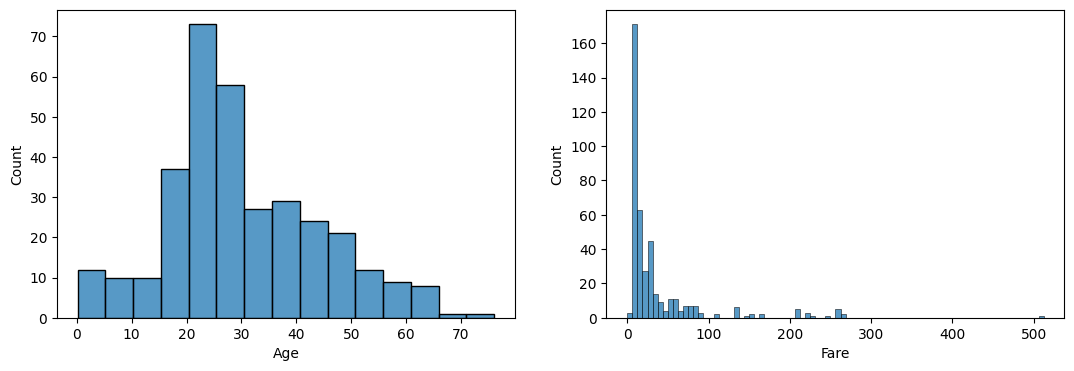

In [274]:
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1, 2, 1)
sns.histplot(df1['Age'])

plt.subplot(1, 2, 2)
sns.histplot(df1['Fare'])

plt.show()

In [275]:
df1[continuous].skew()

Age     0.457361
Fare    3.687213
dtype: float64

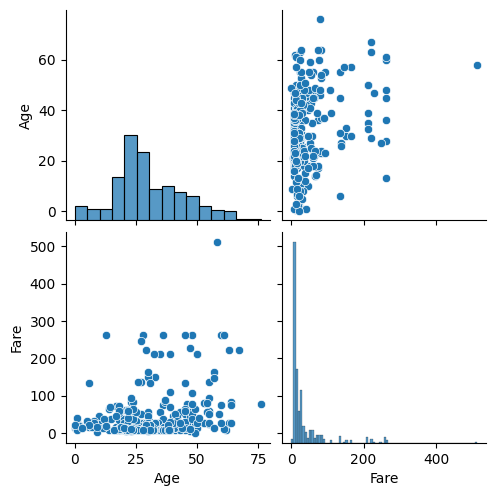

In [276]:
plt.rcParams['figure.figsize'] = (13, 4)
sns.pairplot(df1[continuous])
plt.show()

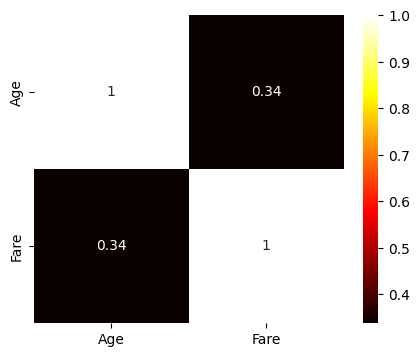

In [277]:
plt.figure(figsize=(5, 4))
sns.heatmap(df1[continuous].corr(), annot=True, cmap='hot')
plt.show()

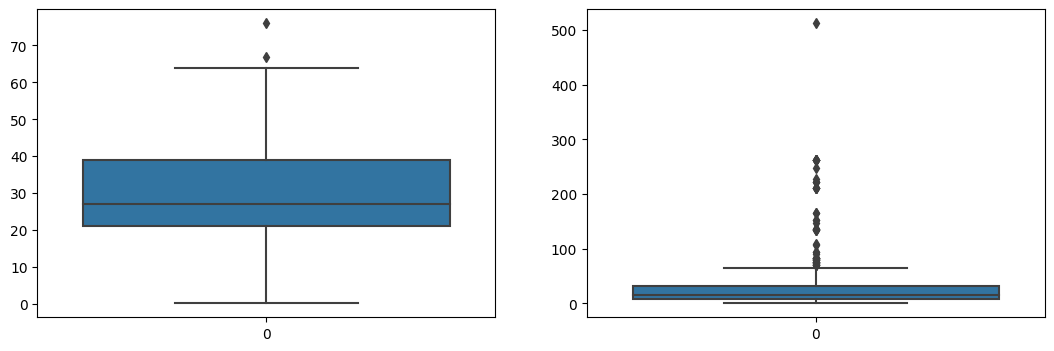

In [278]:
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1, 2, 1)
sns.boxplot(df1['Age'])

plt.subplot(1, 2, 2)
sns.boxplot(df1['Fare'])

plt.show()

#### EDA for discrete variables

In [279]:
df1[discrete_categorical].describe()

,Name,Sex,Embarked,Ticket,Cabin
count,418,418,418,418,91
unique,418,2,3,363,76
top,"Kelly, Mr. James",male,S,PC 17608,B57 B59 B63 B66
freq,1,266,270,5,3


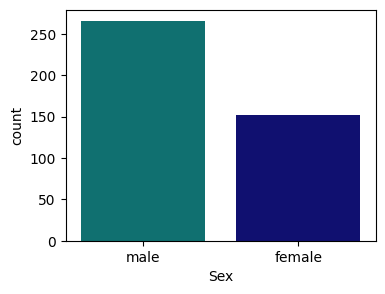

In [280]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df1, x='Sex', palette=['teal', 'navy'])
plt.show()

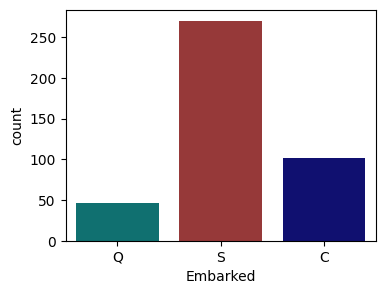

In [281]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df1, x='Embarked', palette=['teal', 'brown', 'navy'])
plt.show()

# Data Preparation

#### 'SciSp' and 'Parch' both columns are family column so I combined it.

In [282]:
df1['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [283]:
df1['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [284]:
df1['Family'] = df1['SibSp'] + df1['Parch']

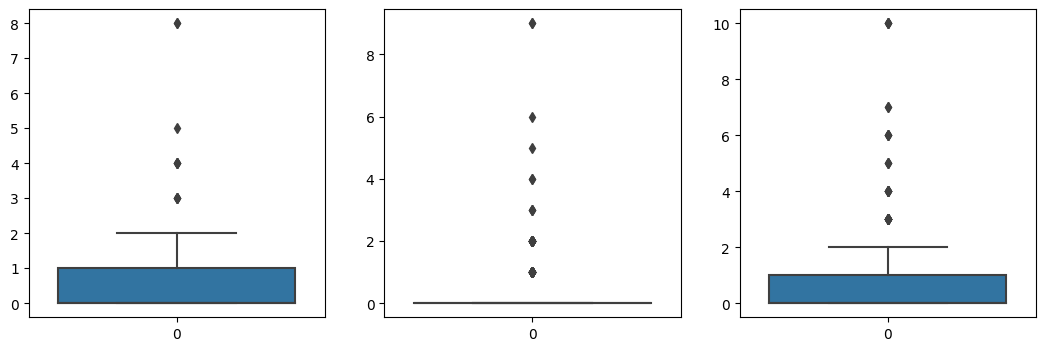

In [285]:
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1, 3, 1)
sns.boxplot(df1['SibSp'])

plt.subplot(1, 3, 2)
sns.boxplot(df1['Parch'])

plt.subplot(1, 3, 3)
sns.boxplot(df1['Family'])
plt.show()

In [286]:
df1.drop(columns= ['SibSp', 'Parch'], inplace=True)

In [287]:
df1['Family'].unique()

array([ 0,  1,  2,  4,  3,  5,  7,  6, 10], dtype=int64)

In [288]:
df1['Family'].value_counts()

Family
0     253
1      74
2      57
3      14
4       7
6       4
10      4
5       3
7       2
Name: count, dtype: int64

#### Missing value treatment

In [289]:
df1.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
Ticket        0
Fare          1
Cabin       327
Embarked      0
Family        0
dtype: int64

In [290]:
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

In [291]:
df1['Fare'].fillna(df1['Fare'].mean(), inplace=True)

In [292]:
df1.drop(columns = 'Cabin', inplace=True)

In [159]:
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

#### drop unimportant column

In [295]:
df1.drop(columns = ['Name', 'Ticket'], inplace=True)

#### Outliers Treatment

**AGE**

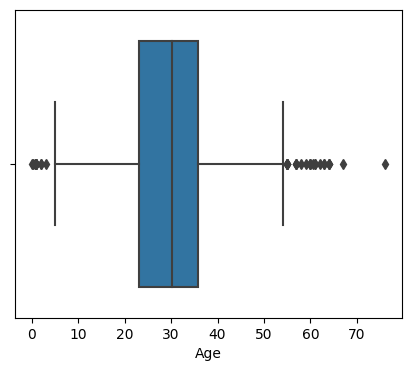

In [297]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df1['Age'])
plt.show()

In [298]:
# Calculate Q1
Q1 = df1['Age'].quantile(0.25)
print("Q1: ", Q1)

# Calculate Q2
Q3 = df1['Age'].quantile(0.75)
print("Q3: ", Q3)

# Calculate IQR
IQR = Q3 - Q1
print('IQR:', IQR)

# Calculate lower limit of outliers
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit', lower_limit)

# Calculate upper limit of outliers
upper_limit = Q3 + (IQR * 1.5)
print('upper_limit', upper_limit)

Q1:  23.0
Q3:  35.75
IQR: 12.75
lower_limit 3.875
upper_limit 54.875


In [299]:
# list of outliers
df1[(df1['Age'] < lower_limit) | (df1['Age'] > upper_limit)].index

Index([  2,  13,  20,  48,  69,  77,  81,  89,  96, 114, 117, 142, 152, 179,
       193, 201, 213, 217, 236, 240, 250, 263, 281, 284, 296, 305, 307, 308,
       314, 316, 343, 354, 356, 378, 387, 409],
      dtype='int64')

In [300]:
# winsorization technqiue (for replacing outliers)
df1['Age'] = df1['Age'].clip(lower=3.875, upper=54.875)
df1['Age']

0      34.50000
1      47.00000
2      54.87500
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

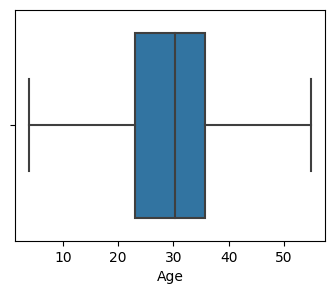

In [301]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df1['Age'])
plt.show()

**FARE**

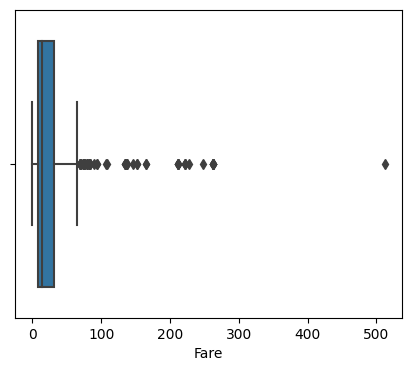

In [302]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df1['Fare'])
plt.show()

In [303]:
# Calculate Q1
Q1 = df1['Fare'].quantile(0.25)
print("Q1: ", Q1)

# Calculate Q2
Q3 = df1['Fare'].quantile(0.75)
print("Q3: ", Q3)

# Calculate IQR
IQR = Q3 - Q1
print('IQR:', IQR)

# Calculate lower limit of outliers
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit', lower_limit)

# Calculate upper limit of outliers
upper_limit = Q3 + (IQR * 1.5)
print('upper_limit', upper_limit)

Q1:  7.8958
Q3:  31.5
IQR: 23.6042
lower_limit -27.5105
upper_limit 66.9063


In [304]:
len(df1[(df1['Fare'] < lower_limit) | (df1['Fare'] > upper_limit)])

55

#### Logarithmic transformation

In [305]:
import numpy as np
df1['Fare'] = np.log(df1['Fare']+0.1) 
df1['Fare'].skew()

0.26397827672277474

even after using lof transformation, I still have outliers so, I can use winsorization technique

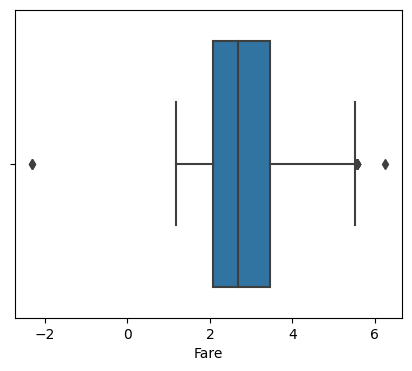

In [306]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df1['Fare'])
plt.show()

In [307]:
# Calculate Q1
Q1 = df1['Fare'].quantile(0.25)
print("Q1: ", Q1)

# Calculate Q2
Q3 = df1['Fare'].quantile(0.75)
print("Q3: ", Q3)

# Calculate IQR
IQR = Q3 - Q1
print('IQR:', IQR)

# Calculate lower limit of outliers
lower_limit = Q1 - (IQR * 2)
print('lower_limit', lower_limit)

# Calculate upper limit of outliers
upper_limit = Q3 + (IQR * 2)
print('upper_limit', upper_limit)

Q1:  2.0789164038190826
Q3:  3.4531571205928664
IQR: 1.3742407167737838
lower_limit -0.669565029728485
upper_limit 6.201638554140434


In [308]:
# winsorization technqiue (for replacing outliers)
df1['Fare'] = df1['Fare'].clip(lower=-0.66, upper=6.20)
df1['Fare']

0      2.070552
1      1.960095
2      2.281106
3      2.170481
4      2.516688
         ...   
413    2.098018
414    4.691348
415    1.994700
416    2.098018
417    3.111660
Name: Fare, Length: 418, dtype: float64

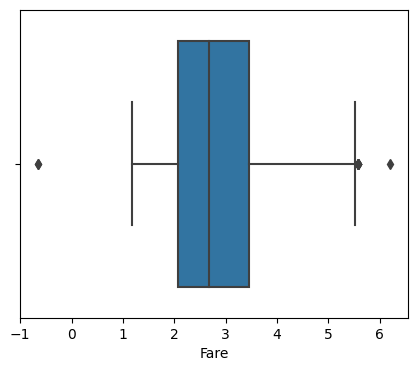

In [309]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df1['Fare'])
plt.show()

In [310]:
len(df1[(df1['Fare'] < lower_limit) | (df1['Fare'] > upper_limit)])

0

In [311]:
df1.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,34.500,2.070552,Q,0
1,3,female,47.000,1.960095,S,1
2,2,male,54.875,2.281106,Q,0
3,3,male,27.000,2.170481,S,0
4,3,female,22.000,2.516688,S,2


In [312]:
df1.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [313]:
df1['Sex'] = df1['Sex'].map({'male':1, 'female':0}).astype('int')
df1['Embarked'] = df1['Embarked'].map({'S':2, 'Q':1, 'C':0}).astype('int')

In [314]:
df1

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,1,34.50000,2.070552,1,0
1,3,0,47.00000,1.960095,2,1
2,2,1,54.87500,2.281106,1,0
3,3,1,27.00000,2.170481,2,0
4,3,0,22.00000,2.516688,2,2
...,...,...,...,...,...,...
413,3,1,30.27259,2.098018,2,0
414,1,0,39.00000,4.691348,0,0
415,3,1,38.50000,1.994700,2,0
416,3,1,30.27259,2.098018,2,0


# Modeling & Evaluation

for the future data there is no need of modeling because my model is already ready for the predicting on the unseen data

In [315]:
gb_pca_model

GradientBoostingClassifier()

# Predcition

### according to decision tree only five features are important and we dropped 'Embarked' feature

In [316]:
df1.drop(columns = ['Embarked'], inplace=True)

In [317]:
df1

,Pclass,Sex,Age,Fare,Family
0,3,1,34.50000,2.070552,0
1,3,0,47.00000,1.960095,1
2,2,1,54.87500,2.281106,0
3,3,1,27.00000,2.170481,0
4,3,0,22.00000,2.516688,2
...,...,...,...,...,...
413,3,1,30.27259,2.098018,0
414,1,0,39.00000,4.691348,0
415,3,1,38.50000,1.994700,0
416,3,1,30.27259,2.098018,0


In [318]:
final_model = np.array(svm_pca_model.predict(df1)).reshape(-1, 1)
final_model

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [319]:
# Convert array to dataframe
df2 = pd.DataFrame(final_model, columns=['Survived'], index=list(range(892, 1310)))
df2

,Survived
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,0
1307,0
1308,0


In [320]:
df2.to_csv('gender_submission.csv')

### Save a model

In [187]:
from joblib import dump
dump(svm_pca_model, 'titanic.joblib')

['titanic.joblib']